In [70]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')
# Ensure punkt resource is downloaded
try:
    nltk.data.find('tokenizers/punkt')
except LookupError:
    print("Downloading 'punkt' tokenizer...")
    nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [71]:
import re
import nltk

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('punkt_tab')

# Define the text preprocessing function
def preprocess_text(text):
    print(f"Original Text: {text[:100]}...")  # Display the first 100 characters of the original text

    # Step 1: Remove special characters and extra spaces
    clean_text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation and special characters
    clean_text = re.sub(r'\s+', ' ', clean_text).strip()  # Normalize whitespace
    print(f"After Removing Special Characters: {clean_text[:100]}...")

    # Step 2: Convert text to lowercase
    clean_text = clean_text.lower()
    print(f"After Converting to Lowercase: {clean_text[:100]}...")

    # Step 3: Tokenize the text
    words = word_tokenize(clean_text)
    print(f"Tokenized Words: {words[:10]}...")  # Display the first 10 words

    # Step 4: Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_words = [word for word in words if word not in stop_words]
    print(f"After Removing Stopwords: {' '.join(filtered_words[:20])}...")  # Display the first 20 filtered words

    # Step 5: apply stemming or lemmatization (commented here for modularity)
    # from nltk.stem import PorterStemmer
    # stemmer = PorterStemmer()
    # stemmed_words = [stemmer.stem(word) for word in filtered_words]
    # print(f"After Stemming: {' '.join(stemmed_words[:20])}...")

    return ' '.join(filtered_words)

# Example Usage
sample_text = """
Natural Language Processing is a fascinating field of AI. It includes Text Preprocessing, Machine Learning, and more!
"""
preprocessed_text = preprocess_text(sample_text)
print(f"Final Preprocessed Text: {preprocessed_text[:100]}...")


Original Text: 
Natural Language Processing is a fascinating field of AI. It includes Text Preprocessing, Machine L...
After Removing Special Characters: Natural Language Processing is a fascinating field of AI It includes Text Preprocessing Machine Lear...
After Converting to Lowercase: natural language processing is a fascinating field of ai it includes text preprocessing machine lear...
Tokenized Words: ['natural', 'language', 'processing', 'is', 'a', 'fascinating', 'field', 'of', 'ai', 'it']...
After Removing Stopwords: natural language processing fascinating field ai includes text preprocessing machine learning...
Final Preprocessed Text: natural language processing fascinating field ai includes text preprocessing machine learning...


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [72]:
import requests
from bs4 import BeautifulSoup


# Define function to scrape MIT OpenCourseWare course details
def scrape_mit_ocw_course(url):
    try:
        print(f"Fetching page content from: {url}")
        response = requests.get(url)
        response.raise_for_status()  # Raise HTTPError for bad responses
        soup = BeautifulSoup(response.content, 'html.parser')
        print("Page content fetched successfully!")

        # Extract course title
        title_element = soup.find('h1')
        course_title = title_element.get_text(strip=True) if title_element else "N/A"
        print(f"Course Title: {course_title}")

        # Extract course description
        description_element = soup.find('div', id='expanded-description')  # Check the ID or class
        course_description = description_element.get_text(strip=True) if description_element else "N/A"
        print(f"Course Description: {course_description[:100]}...")  # Show first 100 characters

        # Extract syllabus link
        syllabus_link_element = soup.find('a', href=True, text="Syllabus")
        syllabus_link = f"https://ocw.mit.edu{syllabus_link_element['href']}" if syllabus_link_element else "N/A"
        print(f"Syllabus Link: {syllabus_link}")

        # Extract lecture videos link
        lecture_videos_element = soup.find('a', href=True, text="Lecture Videos")
        lecture_videos_link = f"https://ocw.mit.edu{lecture_videos_element['href']}" if lecture_videos_element else "N/A"
        print(f"Lecture Videos Link: {lecture_videos_link}")

        # Extract instructor names
        instructors = [
            preprocess_text(instr.get_text())
            for instr in soup.select('.course-info-instructor')
        ]
        print(f"Instructors: {instructors}")

        # Extract topics
        topics = [
            preprocess_text(topic.get_text())
            for topic in soup.select('.topic-text-wrapper a')
        ]
        print(f"Topics: {topics}")

        # Extract learning resource types
        resources = [
            preprocess_text(resource.get_text())
            for resource in soup.select('.learning-resource-type-item span')
        ]
        print(f"Learning Resources: {resources}")

        # Structure scraped data
        course_data = {
            "course_title": preprocess_text(course_title),
            "course_description": preprocess_text(course_description),
            "syllabus_link": syllabus_link,
            "lecture_videos_link": lecture_videos_link,
            "instructors": instructors,
            "topics": topics,
            "learning_resources": resources
        }
        print("Data scraping and preprocessing complete!")
        return course_data

    except Exception as e:
        print(f"An error occurred: {e}")
        return {}

# Example usage:
url = "https://ocw.mit.edu/courses/electrical-engineering-and-computer-science/6-034-artificial-intelligence-fall-2010/"
data = scrape_mit_ocw_course(url)
print(data)


Fetching page content from: https://ocw.mit.edu/courses/electrical-engineering-and-computer-science/6-034-artificial-intelligence-fall-2010/
Page content fetched successfully!
Course Title: Artificial Intelligence
Course Description: This course introduces students to the basic knowledge representation, problem solving, and learning...
Syllabus Link: N/A
Lecture Videos Link: N/A
Original Text: Patrick Henry Winston...
After Removing Special Characters: Patrick Henry Winston...
After Converting to Lowercase: patrick henry winston...
Tokenized Words: ['patrick', 'henry', 'winston']...
After Removing Stopwords: patrick henry winston...
Original Text: Patrick Henry Winston...
After Removing Special Characters: Patrick Henry Winston...
After Converting to Lowercase: patrick henry winston...
Tokenized Words: ['patrick', 'henry', 'winston']...
After Removing Stopwords: patrick henry winston...
Instructors: ['patrick henry winston', 'patrick henry winston']
Original Text: Engineering...
After 

<ipython-input-72-93fb3a6fedf0>:25: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  syllabus_link_element = soup.find('a', href=True, text="Syllabus")
<ipython-input-72-93fb3a6fedf0>:30: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  lecture_videos_element = soup.find('a', href=True, text="Lecture Videos")


In [73]:
import json

with open("MIT_Course_Data.json", "w") as file:
    json.dump(data, file, indent=4)
print("Data saved to MIT_Course_Data.json")

Data saved to MIT_Course_Data.json


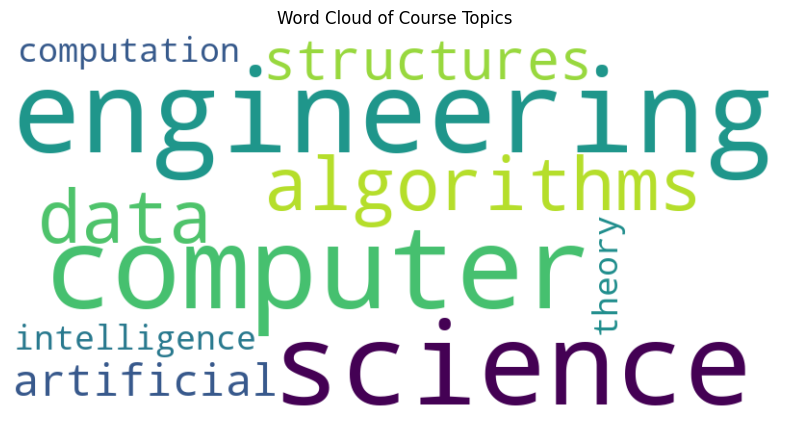

Most Common Topics: [('engineering', 2), ('computer science', 2), ('algorithms data structures', 2), ('artificial intelligence', 2), ('theory computation', 2)]


In [74]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

# Visualize course topics in a word cloud
if data["topics"]:
    topics_text = ' '.join(data["topics"])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(topics_text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title("Word Cloud of Course Topics")
    plt.show()

# Frequency analysis
if data["topics"]:
    topics_freq = Counter(data["topics"])
    print("Most Common Topics:", topics_freq.most_common(5))


In [75]:
!pip install faiss-cpu
!pip install sentence-transformers

In [76]:
# Retriever RAG
import json
import faiss
from sentence_transformers import SentenceTransformer
import numpy as np

# Load the MIT OCW JSON data
with open('MIT_Course_Data.json', 'r') as f:
    data = json.load(f)

# Check the structure of the loaded data
print(f"Data type: {type(data)}")
print(f"Keys in the data: {data.keys()}")  # List the keys of the dictionary

# Since 'data' is a dictionary and represents one course, process it directly
def preprocess_content(course_data):
    try:
        # Combine relevant fields into a single string for indexing
        return f"{course_data['course_title']} - {course_data['course_description']} Topics: {', '.join(course_data['topics'])}"
    except KeyError as e:
        print(f"Missing key: {e}")
        return ""

# If your data contains multiple courses, you need to access them correctly
# Assuming 'data' contains a list of course information under a key, modify the code:
if isinstance(data, dict) and 'courses' in data:  # Adjust based on your actual data structure
    courses = data['courses']
    contents = [preprocess_content(course) for course in courses]
else:
    # If it's a single course dictionary, process it directly
    contents = [preprocess_content(data)]

# Output the results
print(f"Indexed {len(contents)} courses.")
print(contents[:5])  # Preview the first 5 indexed contents

# Initialize the Sentence Transformer model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Encode the content into embeddings
encoded_embeddings = model.encode(contents, convert_to_tensor=True)

# Convert the embeddings to numpy arrays (FAISS uses numpy)
encoded_embeddings = np.array(encoded_embeddings)


# Create a FAISS index (using L2 distance for similarity search)
embedding_dimension = encoded_embeddings.shape[1]
index = faiss.IndexFlatL2(embedding_dimension)

# Add the embeddings to the FAISS index
index.add(encoded_embeddings)
print(f"FAISS index built with {index.ntotal} vectors.")




Data type: <class 'dict'>
Keys in the data: dict_keys(['course_title', 'course_description', 'syllabus_link', 'lecture_videos_link', 'instructors', 'topics', 'learning_resources'])
Indexed 1 courses.
['artificial intelligence - course introduces students basic knowledge representation problem solving learning methods artificial intelligence upon completion 6034 students able develop intelligent systems assembling solutions concrete computational problems understand role knowledge representation problem solving learning intelligentsystem engineering appreciate role problem solving vision language understanding human intelligence computational perspectiveshow less Topics: engineering, computer science, algorithms data structures, artificial intelligence, theory computation, engineering, computer science, algorithms data structures, artificial intelligence, theory computation']
FAISS index built with 1 vectors.


In [78]:
# Function to retrieve the most relevant content for a given query
def retrieve_content(query, top_k=1):
    # Encode the query into an embedding
    query_embedding = model.encode([query], convert_to_tensor=True)
    query_embedding = np.array(query_embedding)

    # Perform the similarity search (find top_k most similar entries)
    distances, indices = index.search(query_embedding, top_k)

    # Retrieve the content for the most similar indices
    retrieved_content = [contents[i] for i in indices[0]]

    # Print distances (optional, for debugging)
    print(f"Distances: {distances}")

    return retrieved_content

# Example usage: Retrieve content based on a user query
query = "What do we learn in Artificial Intelligence course?"
retrieved_content = retrieve_content(query)

# Display the retrieved content
print("Retrieved Content:")
for content in retrieved_content:
    print(content)


Distances: [[0.5925404]]
Retrieved Content:
artificial intelligence - course introduces students basic knowledge representation problem solving learning methods artificial intelligence upon completion 6034 students able develop intelligent systems assembling solutions concrete computational problems understand role knowledge representation problem solving learning intelligentsystem engineering appreciate role problem solving vision language understanding human intelligence computational perspectiveshow less Topics: engineering, computer science, algorithms data structures, artificial intelligence, theory computation, engineering, computer science, algorithms data structures, artificial intelligence, theory computation


In [81]:
from transformers import pipeline

# Load T5 model pipeline
generator = pipeline("text2text-generation", model="t5-small", tokenizer="t5-small")

def generate_response(retrieved_content, query):
    # Combine retrieved content
    combined_content = " ".join(retrieved_content)
    prompt = f"Answer the query based on the content: {combined_content}. Query: {query}"

    # Generate response
    response = generator(prompt, max_length=150, do_sample=True, top_k=10, num_return_sequences=1)
    return response[0]['generated_text']

# Test the generator
generated_response = generate_response(retrieved_content, query)
print(f"Generated Response: {generated_response}")

Generated Response: artificial intelligence courses artificial intelligence upon completion. Query: What do we learn in Artificial Intelligence course?


In [88]:
import faiss
from sentence_transformers import SentenceTransformer
from transformers import pipeline
import json
import numpy as np

# Load JSON data
with open('MIT_Course_Data.json', 'r') as f:
    course_data = json.load(f)

# Ensure course_data is a list
if isinstance(course_data, dict):  # Single course case
    course_data = [course_data]

# Step 1: Prepare Content for Indexing
retriever_model = SentenceTransformer('all-MiniLM-L6-v2')

def prepare_content_v2(course):
    enriched_content = course.get('course_title', '') + ' ' + course.get('course_description', '')
    return enriched_content

# Prepare the corpus
corpus = [prepare_content_v2(course) for course in course_data]
corpus_embeddings = retriever_model.encode(corpus, convert_to_tensor=False)

# Create the FAISS index
dimension = corpus_embeddings.shape[1]
index = faiss.IndexFlatL2(dimension)
index.add(corpus_embeddings)

print(f"FAISS index created with {len(corpus)} items.")

# Step 2: Define Retriever
def retrieve_content_v2(query, top_k=1):
    query_embedding = retriever_model.encode([query], convert_to_tensor=False)
    distances, indices = index.search(np.array(query_embedding).astype('float32'), top_k)
    results = [corpus[idx] for idx in indices[0]]
    return results

# Step 3: Define Generator
generator = pipeline("text2text-generation", model="google/flan-t5-large", tokenizer="google/flan-t5-large")

def generate_response_v2(retrieved_content, query):
    prompt = f"Use the following course content to answer the query:\n\n{retrieved_content}\n\nQuery: {query}"
    response = generator(prompt, max_length=150, do_sample=False, top_p=0.9, num_return_sequences=1)
    return response[0]['generated_text']

# Step 4: RAG Pipeline
def rag_pipeline_v2(query):
    print(f"User Query: {query}")

    # Retrieve Content
    retrieved = retrieve_content_v2(query)
    print(f"Retrieved Content: {retrieved}")

    # Generate Response
    if not retrieved:
        return "No relevant content found."

    response = generate_response_v2(retrieved[0], query)
    print(f"Generated Response: {response}")
    return response

# Test the RAG Pipeline
query = "What do we learn in Artificial Intelligence course?"
response = rag_pipeline_v2(query)
print(f"\nFinal Response: {response}")


FAISS index created with 1 items.
User Query: What do we learn in Artificial Intelligence course?
Retrieved Content: ['artificial intelligence course introduces students basic knowledge representation problem solving learning methods artificial intelligence upon completion 6034 students able develop intelligent systems assembling solutions concrete computational problems understand role knowledge representation problem solving learning intelligentsystem engineering appreciate role problem solving vision language understanding human intelligence computational perspectiveshow less']
Generated Response: basic knowledge representation problem solving learning methods artificial intelligence

Final Response: basic knowledge representation problem solving learning methods artificial intelligence


In [89]:
!pip install gradio

In [92]:
import json
import gradio as gr
from sentence_transformers import SentenceTransformer
from transformers import pipeline
import faiss
import numpy as np

# Step 1: Load course data from JSON
with open('MIT_Course_Data.json', 'r') as file:
    course_data = json.load(file)

# Ensure course_data is a list
if isinstance(course_data, dict):  # Single course case
    course_data = [course_data]

# Step 2: Initialize the Retriever Model and Create the FAISS Index
retriever_model = SentenceTransformer('all-MiniLM-L6-v2')

# Prepare the content for indexing
def prepare_content(course_data):
    return [
        course.get('course_title', '') + ' ' + course.get('course_description', '')
        for course in course_data
    ]

# Create corpus and encode it
corpus = prepare_content(course_data)
corpus_embeddings = retriever_model.encode(corpus, convert_to_tensor=False)

# Create a FAISS index and add embeddings
dimension = corpus_embeddings.shape[1]
index = faiss.IndexFlatL2(dimension)
index.add(corpus_embeddings)

# Step 3: Define the Retriever Function
def retrieve_content(query, top_k=1):
    query_embedding = retriever_model.encode([query], convert_to_tensor=False)
    distances, indices = index.search(np.array(query_embedding).astype('float32'), top_k)
    results = [corpus[idx] for idx in indices[0]]
    return results

# Step 4: Define the Generator Function
generator = pipeline("text2text-generation", model="google/flan-t5-large", tokenizer="google/flan-t5-large")

def generate_response(retrieved_content, query):
    prompt = f"Use the following course content to answer the query:\n\n{retrieved_content}\n\nQuery: {query}"
    response = generator(prompt, max_length=150, do_sample=False, top_p=0.9, num_return_sequences=1)
    return response[0]['generated_text']

# Step 5: Create the Gradio Interface
def chat_with_rag(query):
    retrieved = retrieve_content(query)
    if not retrieved:
        return "No relevant content found."
    response = generate_response(retrieved[0], query)
    return response

# Create the Gradio interface
iface = gr.Interface(
    fn=chat_with_rag,
    inputs=gr.Textbox(lines=2, placeholder="Ask me about the courses..."),
    outputs="text",
    title="RAG-based Course Chatbot",
    description="Ask questions about available courses, and get answers using a Retrieval-Augmented Generation (RAG) pipeline."
)

# Launch the interface
iface.launch()


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://2cb780bda48aa32820.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [60]:
#import Ollma for RAG

import os

# Creating the bash script as a string
model_name = "llama3"  # Replace with your desired model name
bash_script = f'''#!/bin/bash

# Log file
LOG_FILE="output.log"

# Function to log and run a command
run_command() {{
    echo "$1" >> "$LOG_FILE"
    echo "Running: $1"
    eval $1 >> "$LOG_FILE" 2>&1

    if [ $? -ne 0 ]; then
        echo "Error running command: $1" >> "$LOG_FILE"
    fi
}}

# Part 1: Run system update and installation commands
echo "Starting system updates and installations..." | tee -a "$LOG_FILE"

run_command "apt update"
run_command "apt install -y pciutils lshw"
run_command "curl -fsSL https://ollama.com/install.sh | sh"

# Part 2: Run Ollama server and pull model commands
echo "Starting Ollama server and pulling model..." | tee -a "$LOG_FILE"

# Run ollama serve in the background
echo "Started Ollama server..." | tee -a "$LOG_FILE"
ollama serve >> "$LOG_FILE" 2>&1 &

# Sleep for 10 seconds to allow the server to initialize
sleep 10

# Pull the model (wait for this command to complete)
run_command "ollama pull {model_name}"

echo "Leave a star if like my work https://github.com/junioralive/ollama-colab"
echo "All commands executed. Check $LOG_FILE for details."
'''

# Write the bash script to a file
with open('script.sh', 'w') as f:
    f.write(bash_script)

# Make the script executable
os.chmod('script.sh', 0o755)

print("Bash script 'script.sh' created and made executable.")

# Run the bash script
!bash script.sh


Bash script 'script.sh' created and made executable.
Starting system updates and installations...
Running: apt update
Running: apt install -y pciutils lshw
Running: curl -fsSL https://ollama.com/install.sh | sh
Starting Ollama server and pulling model...
Started Ollama server...
Running: ollama pull llama3
Leave a star if like my work https://github.com/junioralive/ollama-colab
All commands executed. Check output.log for details.


In [61]:
# prompt: pip install langchain
!pip install ollama langchain-ollama transformers langchain
!pip install langchain
!pip install langchain_community
!pip install faiss-cpu transformers


In [62]:
import ollama
print(dir(ollama))  # Lists all attributes and functions
#help(ollama)        # Provides documentation about the module

#from ollama import Generator  # Example: importing a specific class or function
#generator = ollama.Generator(model="llama3")  # Adjust based on the actual class



['AsyncClient', 'ChatResponse', 'Client', 'EmbedResponse', 'EmbeddingsResponse', 'GenerateResponse', 'ListResponse', 'Message', 'Options', 'ProcessResponse', 'ProgressResponse', 'RequestError', 'ResponseError', 'ShowResponse', 'StatusResponse', 'Tool', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '_client', '_types', '_utils', 'chat', 'copy', 'create', 'delete', 'embed', 'embeddings', 'generate', 'list', 'ps', 'pull', 'push', 'show']


In [63]:
if hasattr(ollama, 'generate'):
    print("Found 'generate' function. Try using it.")


Found 'generate' function. Try using it.


In [64]:
import time
import ollama

query = "What do we learn in Artificial Intelligence course?"
def ollama_generate(retrieved_content, query):
    combined_content = " ".join(retrieved_content)
    prompt = f"Context: {combined_content}\nQuery: {query}"
    response1 = ollama.generate(model="llama3", prompt=prompt)  # Adjust based on actual API
    return response1

print(response)




model='llama3' created_at='2024-12-08T08:33:34.238221971Z' done=True done_reason='stop' total_duration=345738822154 load_duration=37260087736 prompt_eval_count=17 prompt_eval_duration=17928000000 eval_count=210 eval_duration=290549000000 response="The stars, they twinkle bright,\nA celestial show, a wondrous sight.\nLike diamonds scattered across the sky,\nThey shine with beauty, passing us by.\n\nTheir gentle glow, a beacon true,\nGuides us through life's journey anew.\nIn the darkness of night's veil,\nThey stand like sentinels, without fail.\n\nWith names and stories, they're told,\nOf myths and legends, young and old.\nOrion's belt, a hunter's pride,\nAndromeda's galaxy, where stars reside.\n\nThe constellations, a map so fine,\nA navigation chart, divine.\nFor sailors, travelers, and dreamers too,\nThe stars have been a guiding light or two.\n\nTheir soft whisper, a gentle breeze,\nA reminder of the universe's ease.\nOf secrets hidden, yet to be told,\nAnd mysteries that only they

In [65]:
!pip install streamlit gradio

In [66]:
import streamlit as st
import json
from sentence_transformers import SentenceTransformer
import faiss
from transformers import pipeline
from langchain_community.llms import Ollama
import numpy as np

# Step 1: Load the preprocessed data and initialize retriever and generators
@st.cache_resource
def initialize():
    # Load scraped course data
    with open('MIT_Course_Data.json', 'r') as f:
        course_data = json.load(f)

    # Prepare corpus
    def prepare_content(data):
        return (
            data['course_description'] + " " +
            " ".join(data['topics']) + " " +
            " ".join(data['learning_resources'])
        )
    corpus = [prepare_content(course_data)]

    # Initialize retriever
    retriever_model = SentenceTransformer('all-MiniLM-L6-v2')
    embeddings = retriever_model.encode(corpus)
    index = faiss.IndexFlatL2(embeddings.shape[1])
    index.add(embeddings)

    # Initialize generators
    t5_generator = pipeline("text2text-generation", model="t5-small", tokenizer="t5-small")
    ollama = Ollama(model="llama3")

    return retriever_model, index, corpus, t5_generator, ollama

retriever_model, index, corpus, t5_generator, ollama = initialize()

# Step 2: Define retriever function
def retrieve_content(query, top_k=1):
    query_embedding = retriever_model.encode([query])
    distances, indices = index.search(np.array(query_embedding).astype('float32'), top_k)
    return [corpus[idx] for idx in indices[0]]

# Step 3: Define generators
def t5_generate(retrieved, query):
    combined_content = " ".join(retrieved)
    prompt = f"Answer the query based on the content: {combined_content}. Query: {query}"
    return t5_generator(prompt, max_length=150)[0]['generated_text']

def ollama_generate(retrieved, query):
    combined_content = " ".join(retrieved)
    prompt = f"Context: {combined_content}\nQuery: {query}"
    return ollama(prompt)

# Step 4: Define RAG pipeline
def rag_pipeline(query, generator_type="T5"):
    retrieved = retrieve_content(query)
    if generator_type == "T5":
        return t5_generate(retrieved, query)
    elif generator_type == "Ollama":
        return ollama_generate(retrieved, query)

# Step 5: Build Streamlit Interface
st.title("Course Query Chatbot")
st.write("Ask questions about the course content!")

# Input query
query = st.text_input("Enter your query:", "What are the applications of programming languages?")

if st.button("Get Response"):
    st.write("### T5 Response")
    st.write(rag_pipeline(query, generator_type="T5"))
    st.write("### Ollama Response")
    st.write(rag_pipeline(query, generator_type="Ollama"))


2024-12-08 08:39:15.418 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-08 08:39:15.425 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-08 08:39:15.430 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-08 08:39:15.446 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-08 08:39:15.450 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-08 08:39:15.453 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-08 08:39:15.456 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-08 08:39:15.459 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [67]:
!pip install -U langchain-ollama

In [68]:
from langchain_ollama import OllamaLLM

In [69]:
from langchain_ollama import OllamaLLM

# Initialize the model
ollama_llm = OllamaLLM(model="llama3")

# Example query
query = "What do we learn in Artificial Intelligence course?"

# Prepare the input as a dictionary in the format expected by the 'invoke' method
input_data = {"input": query}

# Generate response using the 'invoke' method with the formatted input
response = ollama_llm.invoke(input_data)

# Display the response
print(response)


ValueError: Invalid input type <class 'dict'>. Must be a PromptValue, str, or list of BaseMessages.